In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving stc TV Data Set_T3.xlsx to stc TV Data Set_T3.xlsx


In [4]:
df = pd.read_excel(list(uploaded.keys())[0], sheet_name='Sheet1')
df.head()

,Unnamed: 0,user_id_maped,program_name,rating,date_,program_genre
0,0,26138,100 treets,1,2017-05-27,Drama
1,1,7946,Moana,1,2017-05-21,Animation
2,2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,4,15860,Churchill,2,2017-07-07,Biography


In [5]:
print(df.info())
print(df['program_name'].nunique())  # عدد البرامج
print(df['user_id_maped'].nunique()) # عدد المستخدمين
print(df['rating'].value_counts())   # تقييمات المستخدمين

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Unnamed: 0     1048575 non-null  int64         
 1   user_id_maped  1048575 non-null  int64         
 2   program_name   1048575 non-null  object        
 3   rating         1048575 non-null  int64         
 4   date_          1048575 non-null  datetime64[ns]
 5   program_genre  1048575 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 48.0+ MB
None
8013
11578
rating
1    264293
4    262113
3    261505
2    260664
Name: count, dtype: int64


In [6]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.dropna(subset=['rating'], inplace=True)

In [8]:
user_program_matrix = df.pivot_table(index='user_id_maped', columns='program_name', values='rating')
user_program_matrix.fillna(0, inplace=True)
user_program_matrix.head()

program_name,#FollowFriday,10 Days in a Madhouse,100 treets,101 Dalmatians,102 Dalmatians,11.6,12 Monkeys Arms Of Mine,12 Monkeys Atari,12 Monkeys Blood Washed Away,12 Monkeys Bodies Of Water,...,iCarly iLike Jake,iCarly iNevel,iCarly iPilot,iCarly iSpy A Mean Teacher,iCarly iWanna tay With pencer,iCarly iWant A World Record,iCarly iWant More Viewers,iCarly iWill Date Freddie,xXx,xXx: Return of Xander Cage
user_id_maped,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,1.5,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
similarity = cosine_similarity(user_program_matrix.T)  # transpose to get item-item
similarity_df = pd.DataFrame(similarity, index=user_program_matrix.columns, columns=user_program_matrix.columns)

In [10]:
def get_recommendations(program_name, similarity_matrix, top_n=5):
    sim_scores = similarity_matrix[program_name]
    sim_scores = sim_scores.sort_values(ascending=False)
    return sim_scores[1:top_n+1]  # نستبعد البرنامج نفسه

top_5_recommendations = get_recommendations('Moana', similarity_df)
print("Top 5 recommendations for viewers of 'Moana':")
print(top_5_recommendations)

Top 5 recommendations for viewers of 'Moana':
program_name
Trolls                                   0.572358
Surf's Up : WaveMania                    0.529424
The Mermaid Princess                     0.493362
The Boss Baby                            0.448557
The Jetsons & WWE: Robo-WrestleMania!    0.438942
Name: Moana, dtype: float64


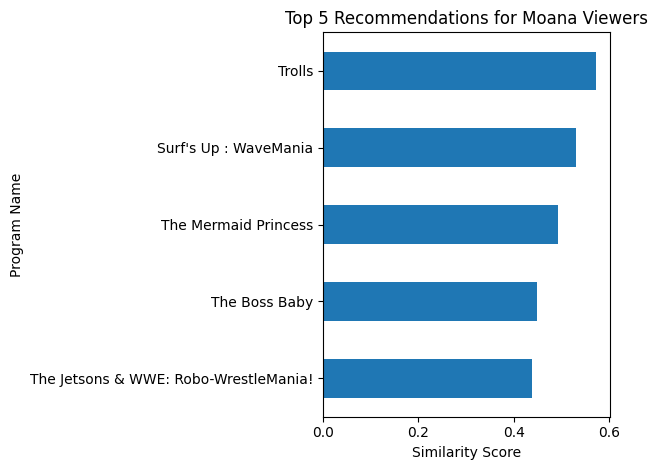

In [11]:
import matplotlib.pyplot as plt

top_5_recommendations.plot(kind='barh', title='Top 5 Recommendations for Moana Viewers')
plt.xlabel('Similarity Score')
plt.ylabel('Program Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
# استخراج التوصيات كجدول
top_5_df = top_5_recommendations.reset_index()
top_5_df.columns = ['Program Name', 'Similarity Score']
top_5_df

,Program Name,Similarity Score
0,Trolls,0.572358
1,Surf's Up : WaveMania,0.529424
2,The Mermaid Princess,0.493362
3,The Boss Baby,0.448557
4,The Jetsons & WWE: Robo-WrestleMania!,0.438942
